In [ ]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
#matplotlib.use('tkAgg')
import sys
sys.path.append('../')
import parse_pws_data as parsePWS
import pandas as pd

##### merge .csvs in a folder into single csv

In [2]:
parsePWS.merge_csv(inDir='../test_data/ITIROLAX2/',
                   outfile='../test_data/ITIROLAX2/Merged_CSV.csv')

read data to dataframe

In [3]:
dat=pd.read_csv('../test_data/ITIROLAX2/Merged_CSV.csv',
                sep=';',
                index_col='datetime',
                na_values=['NaN',-9999],
                parse_dates=True)

In [4]:
dat.head()

,temp,dewPoint,humidity,wDir,wAvg,wGust,pressure,pI,pCum
datetime,,,,,,,,,
2022-06-15 00:04:00,13.89,1.11,0.04,SSW,0.0,0.0,763.02,0.0,0.0
2022-06-15 00:09:00,13.33,0.56,0.04,South,0.0,0.0,763.02,0.0,0.0
2022-06-15 00:14:00,13.33,1.11,0.04,SSW,0.0,0.0,763.02,0.0,0.0
2022-06-15 00:19:00,13.33,0.56,0.04,SSW,0.0,0.0,763.02,0.0,0.0
2022-06-15 00:24:00,13.33,0.56,0.04,SSW,0.0,0.0,763.02,0.0,0.0


pI (precip intensities) seems unreliable, so precip Sums ['Ps'] for each time-step are calculated from differences of pCum (cumulative precipitation)

In [5]:
import numpy as np
dat['pS'] = np.maximum(dat['pCum'].shift(-1)-dat['pCum'],0)

##### some test-plotting

1) plot hourly rainfall sums
2) hourly min,max,mean Temperatures

In [6]:
hourlySums=dat['pS'].resample('h').sum()
dailySums =dat['pS'].resample('D').sum()

T_hourly_max = dat['temp'].resample('h').max()
T_hourly_min = dat['temp'].resample('h').min()
T_hourly_mean = dat['temp'].resample('h').mean()


In [7]:
rfHourl = hourlySums.to_list()
rfDaily = dailySums.to_list()
dTime   = [x.to_pydatetime() for x in hourlySums.index]
dTime_D = [x.to_pydatetime() for x in dailySums.index]

Text(0.5, 1.0, 'Data ITIROLAX2')

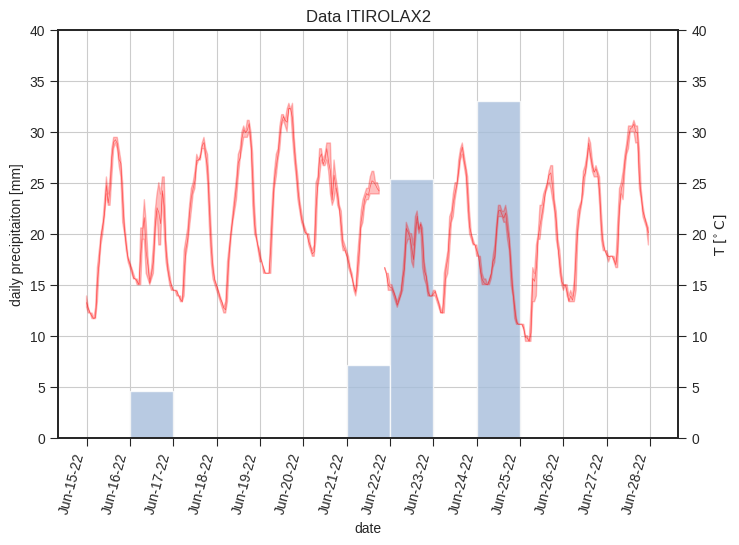

In [8]:
import matplotlib.dates as mdates
plt.close()
plt.style.use('seaborn-ticks')
fig, ax = plt.subplots(figsize=(8,6),dpi=100.)
ax.bar(dTime_D,rfDaily,width=1,align='edge',color='#a6bddb',edgecolor='white',alpha=0.8)
#ax.bar(dTime,rfHourl,width=1/24.,align='edge',color='#2b8cbe',edgecolor='white',alpha=0.8)

ax.set_ylabel('daily precipitaiton [mm]')
ax.set_xlabel('date')

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))

#ax.yaxis.set_minor_locator(dTime_D)
fig.autofmt_xdate(rotation= 75.)

ax2 = ax.twinx()
ax2.fill_between(dTime,T_hourly_min,T_hourly_max,color='red',alpha=.25)
ax2.plot(dTime,T_hourly_mean,color='red',alpha=.5,lw=0.5)
ax2.set_ylabel(r'$\rm{T}\;[^{\circ}\,\rm{C}]$')

ax.set_ylim(0,40)
ax2.set_ylim(0,40)

ax.grid()
ax.set_title('Data ITIROLAX2')